In [1]:
import skimage.measure as msr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd

In [2]:
# import sys
# sys.path.append("..")

In [3]:
# Importing class from wmark.py
from wmark import WaterMark

In [4]:
import glob
import os
from pathlib import Path

In [5]:
# Source Directory
srcFolder = 'TestSet/'
# Source Path
srcPth = Path(srcFolder).resolve()

In [6]:
# All TIF files in the src_path are now imgs
imgs = srcPth.glob('*.tif')

In [7]:
    def impactFactorMetric(img, seed, mask, min_impact = 0.75, max_impact = 4, steps = 25):
        """ Method for calculating dependency between Impact Factor and PSNR/SSIM

        Arguments:
            img {ndarray} -- original (input) image
            min_impact {int} -- minimum logarithmic value of Impact Factor (default: {0.75})
            max_impact {int} -- maximum logarithmic value of Impact Factor (default: {4})
            steps {int} -- jump between two Impact Factor values (default: {25})
            seed {int} -- pseudo-random; for decoding
            mask {bool} -- pseudo-random; for decoding

        Returns:
            pd.DataFrame -- Impact Factor, PSNR, SSIM as a single Pandas DataFrame
        """
        watermark_object = WaterMark(seed)
        range_max = int(steps)
        # range_max = int(max_impact / steps) + 1
        results = np.zeros([range_max, 3])
        impact_factor = np.logspace(min_impact, max_impact, num=steps)
        
        if mask == 'YES':
            for index in range(0, range_max):
                img_marked = watermark_object.embedMark(img, factor = impact_factor[index])
                psnr_value = msr.compare_psnr(img, img_marked)
                ssim_value = msr.compare_ssim(img, img_marked, multichannel = True)

                results[index, 0] = impact_factor[index]
                results[index, 1] = psnr_value
                results[index, 2] = ssim_value

                # results_all = results[index, 0], results[index, 1], results[index, 2]
                # print(results_all)

            pandas_array = ['Impact Factor', 'PSNR', 'SSIM']
            return pd.DataFrame(results, columns = pandas_array)
        
        elif mask == 'NO':
            for index in range(0, range_max):
                img_marked = watermark_object.embedMark(img, factor = impact_factor[index])
                img_GCR = watermark_object.embedMark(img_marked, factor = impact_factor[index])
                psnr_value = msr.compare_psnr(img, img_GCR)
                ssim_value = msr.compare_ssim(img, img_GCR, multichannel = True)

                results[index, 0] = impact_factor[index]
                results[index, 1] = psnr_value
                results[index, 2] = ssim_value

                # results_all = results[index, 0], results[index, 1], results[index, 2]
                # print(results_all)

            pandas_array = ['Impact Factor', 'PSNR', 'SSIM']
            return pd.DataFrame(results, columns = pandas_array)

In [8]:
# Creating empty DataFrames that will fill up during the loop
dataframeFinalPSNRMarked = pd.DataFrame()
dataframeFinalSSIMMarked = pd.DataFrame()

dataframeFinalPSNRGCR = pd.DataFrame()
dataframeFinalSSIMGCR = pd.DataFrame()

for img in imgs:
    
    imgOriginal = WaterMark.imread(img)

    # Attributes: 
        # img - required
        # seed - required
        # max_impact (logarithmic scale) - optional; default = 0.75
        # max_impact (logarithmic scale) - optional; default = 4
        # steps - optional; default = 25
    dataframeMarked = impactFactorMetric(imgOriginal, seed = 5, mask = 'NO')
    dataframeGCR = impactFactorMetric(imgOriginal, seed = 5, mask = 'YES')
    
    # Creating temporary DataFrames
    dataframeIFMarked = dataframeMarked['Impact Factor']
    dataframePSNRMarked = dataframeMarked['PSNR']
    dataframeSSIMMarked = dataframeMarked['SSIM']
    
    dataframeIFGCR = dataframeGCR['Impact Factor']
    dataframePSNRGCR = dataframeGCR['PSNR']
    dataframeSSIMGCR = dataframeGCR['SSIM']
    
    # Creating final DataFrames (separated for PSNR and SSIM)
    dataframeFinalPSNRMarked = pd.concat([dataframeFinalPSNRMarked, dataframePSNRMarked], axis= 1)
    dataframeFinalSSIMMarked = pd.concat([dataframeFinalSSIMMarked, dataframeSSIMMarked], axis= 1)
    
    dataframeFinalPSNRGCR = pd.concat([dataframeFinalPSNRGCR, dataframePSNRGCR], axis= 1)
    dataframeFinalSSIMGCR = pd.concat([dataframeFinalSSIMGCR, dataframeSSIMGCR], axis= 1)
    
    #Print a dot after looping through each image (to keep track of progress)
    print('.')

/Users/zgebac/miniconda3/envs/img-proc/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/zgebac/miniconda3/envs/img-proc/lib/python3.7/site-packages/skimage/measure/simple_metrics.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


.
.
.
.
.


In [33]:
# Adding Impact Factor values to PSNR/SSIM DataFrames
dataframeFinal_IF_PSNR_Marked = pd.concat([dataframeIFMarked, dataframeFinalPSNRMarked], axis= 1)
dataframeFinal_IF_PSNR_GCR = pd.concat([dataframeIFGCR, dataframeFinalPSNRGCR], axis= 1)

dataframeFinal_IF_SSIM_Marked = pd.concat([dataframeIFMarked, dataframeFinalSSIMMarked], axis= 1)
dataframeFinal_IF_SSIM_GCR = pd.concat([dataframeIFGCR, dataframeFinalSSIMGCR], axis= 1)

In [34]:
# Making Impact Factor index
dataframeFinal_IF_PSNR_Index_Marked = dataframeFinal_IF_PSNR_Marked.set_index('Impact Factor')
dataframeFinal_IF_PSNR_Index_GCR = dataframeFinal_IF_PSNR_GCR.set_index('Impact Factor')

dataframeFinal_IF_SSIM_Index_Marked = dataframeFinal_IF_SSIM_Marked.set_index('Impact Factor')
dataframeFinal_IF_SSIM_Index_GCR = dataframeFinal_IF_SSIM_GCR.set_index('Impact Factor')

In [49]:
# Creating DataFrames with mean PSNR/SSIM values
dataframeFinal_PSNR_Mean_Marked = dataframeFinal_IF_PSNR_Index_Marked.mean(axis = 1)
dataframeFinal_PSNR_Mean_GCR = dataframeFinal_IF_PSNR_Index_GCR.mean(axis = 1)

dataframeFinal_SSIM_Mean_Marked = dataframeFinal_IF_SSIM_Index_Marked.mean(axis = 1)
dataframeFinal_SSIM_Mean_GCR = dataframeFinal_IF_SSIM_Index_GCR.mean(axis = 1)

In [50]:
dataframeFinal_PSNR_Mean = pd.concat([dataframeFinal_PSNR_Mean_Marked, dataframeFinal_PSNR_Mean_GCR], axis= 1)
dataframeFinal_PSNR_Mean.columns = ['Marked', 'GCR']

dataframeFinal_SSIM_Mean = pd.concat([dataframeFinal_SSIM_Mean_Marked, dataframeFinal_SSIM_Mean_GCR], axis= 1)
dataframeFinal_SSIM_Mean.columns = ['Marked', 'GCR']

In [60]:
dataframeFinal_PSNR_Mean

,Marked,GCR
Impact Factor,,
5.623413,inf,inf
7.680981,inf,inf
10.491397,inf,inf
14.330126,inf,inf
19.573418,inf,inf
26.735194,78.560897,84.573291
36.517413,66.519840,72.511318
49.878877,59.665615,65.653778
68.129207,55.644337,61.638200


In [61]:
dataframeFinal_SSIM_Mean

,Marked,GCR
Impact Factor,,
5.623413,1.000000,1.000000
7.680981,1.000000,1.000000
10.491397,1.000000,1.000000
14.330126,1.000000,1.000000
19.573418,1.000000,1.000000
26.735194,0.999990,0.999997
36.517413,0.999914,0.999978
49.878877,0.999614,0.999902
68.129207,0.998908,0.999722


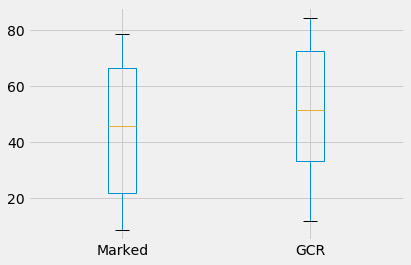

In [62]:
dataframeFinal_PSNR_Mean.boxplot()

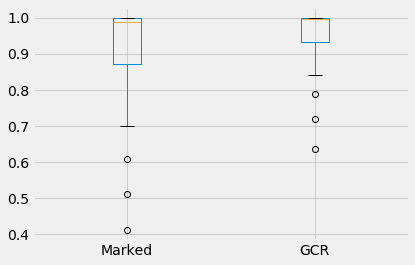

In [63]:
dataframeFinal_SSIM_Mean.boxplot()

Text(0, 88.5, 'For low Impact factor values, PSNR values are very high, but dropping down rapidly.\nWith larger Impact Factor values, PSNR values are still dropping, but not as rapidly.')

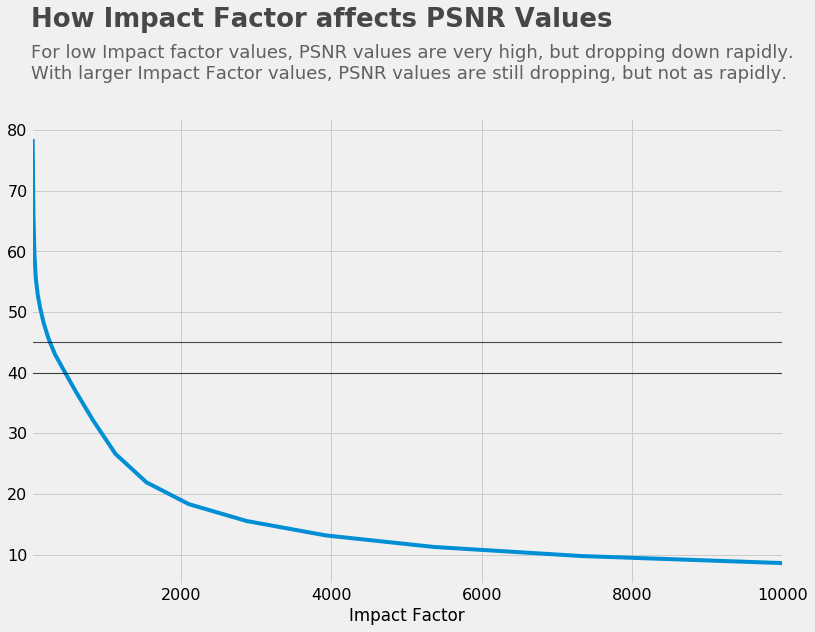

In [42]:
# https://www.dataquest.io/blog/making-538-plots/
style.use('fivethirtyeight')

# Creating Impact Factor / PSNR graph
fteGraph1 = dataframeFinal_PSNR_Mean_Marked.plot(x = 'Impact Factor', y = 'PSNR', figsize = (12, 8))
# Setting rules for labeling axes
fteGraph1.tick_params(axis = 'both', which = 'major', labelsize = 16)

# Creating different lines accross the graph (can be used for important slices of results)
fteGraph1.axhline(y = 40, color = 'black', linewidth = 1.1, alpha = .7)
fteGraph1.axhline(y = 45, color = 'black', linewidth = 1.1, alpha = .7)

# Setting visibility of X-label
fteGraph1.xaxis.label.set_visible(True)


# Title

# Y value is continuous to values on Y-axis. For instance, 
# if the maximum value is 60, the text can begin at 61.

# Alpha indicates text opacity

fteGraph1.text(x = 0, y = 97, s = "How Impact Factor affects PSNR Values",
               fontsize = 26, weight = 'bold', alpha = .7)

# Subtitle
fteGraph1.text(x = 0, y = 88.5,
               s = "For low Impact factor values, PSNR values are very high, but dropping down rapidly.\nWith larger Impact Factor values, PSNR values are still dropping, but not as rapidly.",
              fontsize = 18, alpha = .6)

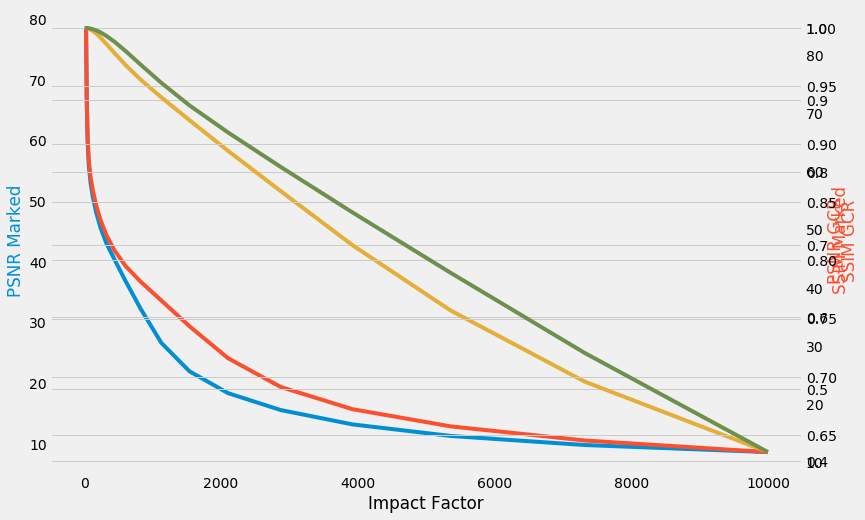

In [59]:
# Colors: https://github.com/matplotlib/matplotlib/blob/38be7aeaaac3691560aeadafe46722dda427ef47/lib/matplotlib/mpl-data/stylelib/fivethirtyeight.mplstyle

plt.style.use('fivethirtyeight')

# Creating graph
fig, ax1 = plt.subplots(figsize=(12,8))

# Setting X-axis and first Y-axis
ax1.set_xlabel('Impact Factor')
ax1.set_ylabel('PSNR Marked', color = '#008fd5')

# Creating a second Y-axis that shares the same X-axis
ax2 = ax1.twinx()  
ax2.set_ylabel('PSNR GCR', color = '#fc4f30')

# Creating a second Y-axis that shares the same X-axis
ax3 = ax1.twinx()  
ax3.set_ylabel('SSIM Marked', color = '#fc4f30')

# Creating a second Y-axis that shares the same X-axis
ax4 = ax1.twinx()  
ax4.set_ylabel('SSIM GCR', color = '#fc4f30')

# Show grid
ax1.grid(False)
ax2.grid(False)

# Setting different colors for each variable
ax1.plot(dataframeFinal_PSNR_Mean_Marked, color = '#008fd5')
ax2.plot(dataframeFinal_PSNR_Mean_GCR, color = '#fc4f30')
ax3.plot(dataframeFinal_SSIM_Mean_Marked, color = '#e5ae38')
ax4.plot(dataframeFinal_SSIM_Mean_GCR, color = '#6d904f')